# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [208]:
import pandas as pd
import numpy as np

In [209]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [210]:
import requests

In [211]:
# download the file
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions = requests.get(URL)

In [212]:
# write the downloaded date to a tsv file
with open('image_predictions.tsv','w') as write_tsv:
    write_tsv.write(image_predictions.text)

In [213]:
# create a pandas dataframe from the tsv file
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Installation of tweepy

In [214]:
# pip install tweepy

Since I created a configfile for to store my API details, I also installed configparser

In [215]:
# pip install configparser

Import the nesessary packages

In [216]:
import configparser
import tweepy

Get the necessary tokens authorization

In [217]:
# get tokens
config = configparser.ConfigParser()
config.read('configfile.ini')
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
# authenticate
auth = tweepy.OAuth2AppHandler(api_key, api_key_secret)

Get the api

In [218]:
api = tweepy.API(auth, wait_on_rate_limit=True)

Get the data for the tweets

In [219]:
# get the tweet ids
tweet_ids = twitter_archive['tweet_id']

In [220]:
tweet_ids


0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [221]:
# since the output would be json file import the json package
import json


In [222]:
# create a function to get the tweet data, store it in a json file, create a dataframe for the result
def get_tweets(tweet_ids):
    num_of_tweets = len(tweet_ids)
    #create a counter
    counter = 0
    #dataframe for the tweets that failed to get
    failed_to_get_id = []
    failed_to_get_error = []
    with open('tweet.json','w') as outfile:
        for tweet_id in tweet_ids:
            counter += 1
            print(f'{counter} of {num_of_tweets}: {tweet_id}')
            try:
                tweet = api.get_status(tweet_id, tweet_mode = 'extended')
                json.dump(tweet._json, outfile)
                print("Success")
                outfile.write('\n')
            except Exception as e:
                print("Fail")
                failed_to_get_id.append(tweet_id)
                failed_to_get_error.append(e)
        print(pd.DataFrame(list(zip(failed_to_get_id, failed_to_get_error)), columns =['tweet_id', 'error']))
    return

In [223]:
%%time
#get_tweets(tweet_ids)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


In [224]:
tweet_from_api = pd.read_json('tweet.json', lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Data quality dimensions

    Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
    Validity: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
    Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
    Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.


##### Visual assessment

In [225]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


1. It could be seen that in some of the columns there are a lot of null values.
2. For dog name, there are entries that only have the letter 'a'

In [226]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


1. For the predicted values, there are items that are not dog_breeds and are false such as paper_towel and orange

In [227]:
tweet_from_api

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2017-02-15 01:04:21+00:00,831670449226514432,831670449226514432,This is Daisy. She has a heart on her butt. 13...,False,"[0, 60]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 831670443132252160, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
331,2017-02-14 23:43:18+00:00,831650051525054464,831650051525054464,"I usually only share these on Friday's, but th...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 831650039864885250, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
332,2017-02-14 17:17:22+00:00,831552930092285952,831552930092285952,This is Dutch. He dressed up as his favorite e...,False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 831552915512901632, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
333,2017-02-14 02:02:51+00:00,831322785565769729,831322785565769728,This is Pete. He has no eyes. Needs a guide do...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 831322776149430272, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


1. There are columns that are duplicates of each other
2. Some columns are list and some are dictionaries
3. The column source is an html code

#### Programatic assessment

In [228]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [229]:
tweet_from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     335 non-null    datetime64[ns, UTC]
 1   id                             335 non-null    int64              
 2   id_str                         335 non-null    int64              
 3   full_text                      335 non-null    object             
 4   truncated                      335 non-null    bool               
 5   display_text_range             335 non-null    object             
 6   entities                       335 non-null    object             
 7   extended_entities              268 non-null    object             
 8   source                         335 non-null    object             
 9   in_reply_to_status_id          20 non-null     float64            
 10  in_reply_to_status_id_str 

In [230]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


1. The number of rows between tables are different
2. There are tables that have wrong datatype
3. There are still retweets
4. There empty or near empty columns
5. There are columns that is the same from one table to another

In [231]:
# Check how many unique tweet_id
len(set(image_predictions['tweet_id']))

2075

Check each of the columns in the tables

In [232]:
tweet_from_api['created_at'].describe()

/tmp/ipykernel_869/2201165250.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_from_api['created_at'].describe()


count                           335
unique                          335
top       2017-08-01 16:23:56+00:00
freq                              1
first     2017-02-14 01:35:49+00:00
last      2017-08-01 16:23:56+00:00
Name: created_at, dtype: object

In [233]:
tweet_from_api.groupby(['truncated'])['id'].count()

truncated
False    335
Name: id, dtype: int64

In [234]:
tweet_from_api['display_text_range'].sample(10)

24     [0, 129]
50     [0, 114]
263    [0, 133]
242     [0, 48]
212    [0, 136]
264    [0, 100]
118    [0, 140]
201    [0, 140]
211    [0, 107]
140    [0, 128]
Name: display_text_range, dtype: object

In [235]:
tweet_from_api['entities'].sample(10)

72     {'hashtags': [], 'symbols': [], 'user_mentions...
112    {'hashtags': [], 'symbols': [], 'user_mentions...
192    {'hashtags': [], 'symbols': [], 'user_mentions...
120    {'hashtags': [], 'symbols': [], 'user_mentions...
251    {'hashtags': [], 'symbols': [], 'user_mentions...
297    {'hashtags': [], 'symbols': [], 'user_mentions...
257    {'hashtags': [], 'symbols': [], 'user_mentions...
156    {'hashtags': [], 'symbols': [], 'user_mentions...
167    {'hashtags': [], 'symbols': [], 'user_mentions...
229    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, dtype: object

In [236]:
tweet_from_api['entities'][0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [237]:
entities_df=pd.json_normalize(tweet_from_api['entities'])
entities_df.head()

,hashtags,symbols,user_mentions,urls,media
0,[],[],[],[],"[{'id': 892420639486877696, 'id_str': '8924206..."
1,[],[],[],[],"[{'id': 892177413194625024, 'id_str': '8921774..."
2,[],[],[],[],"[{'id': 891815175371796480, 'id_str': '8918151..."
3,[],[],[],[],"[{'id': 891689552724799489, 'id_str': '8916895..."
4,"[{'text': 'BarkWeek', 'indices': [129, 138]}]",[],[],[],"[{'id': 891327551943041024, 'id_str': '8913275..."


In [238]:
tweet_from_api['extended_entities'].sample(10)

269    {'media': [{'id': 838905954309529600, 'id_str'...
297    {'media': [{'id': 835152428160978949, 'id_str'...
310    {'media': [{'id': 833722895578886144, 'id_str'...
170    {'media': [{'id': 857263152219791360, 'id_str'...
54                                                   NaN
93     {'media': [{'id': 873580279771926529, 'id_str'...
82     {'media': [{'id': 876484043352588288, 'id_str'...
226    {'media': [{'id': 847116177323253760, 'id_str'...
41                                                   NaN
265    {'media': [{'id': 839549305585295362, 'id_str'...
Name: extended_entities, dtype: object

In [239]:
tweet_from_api['extended_entities'][0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [240]:
tweet_from_api['source'].sample(10)

164    <a href="http://twitter.com/download/iphone" r...
53     <a href="http://twitter.com/download/iphone" r...
326    <a href="http://twitter.com/download/iphone" r...
293    <a href="http://twitter.com/download/iphone" r...
296    <a href="http://twitter.com/download/iphone" r...
322    <a href="http://twitter.com/download/iphone" r...
188    <a href="http://twitter.com/download/iphone" r...
22     <a href="http://twitter.com/download/iphone" r...
200    <a href="http://twitter.com/download/iphone" r...
252    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [241]:
tweet_from_api.groupby(['source'])['id'].count()

source
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      4
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    331
Name: id, dtype: int64

In [242]:
tweet_from_api.groupby(['in_reply_to_status_id'])['id'].count()

in_reply_to_status_id
6.671522e+17    1
7.590995e+17    1
8.319030e+17    1
8.320875e+17    1
8.352460e+17    1
8.380855e+17    1
8.381455e+17    1
8.406983e+17    1
8.476062e+17    1
8.482121e+17    1
8.503288e+17    1
8.558181e+17    1
8.558585e+17    1
8.558616e+17    1
8.571567e+17    1
8.634256e+17    1
8.707262e+17    1
8.795538e+17    1
8.816070e+17    1
8.862664e+17    1
Name: id, dtype: int64

In [243]:
tweet_from_api.groupby(['in_reply_to_user_id'])['id'].count()

in_reply_to_user_id
1.361572e+07    1
1.648776e+07    1
2.068372e+07    1
2.195506e+07    2
2.625958e+07    1
3.058208e+07    1
4.738443e+07    1
7.759620e+07    1
1.806710e+08    1
1.943518e+08    1
2.281182e+09    1
2.894131e+09    1
3.105441e+09    1
4.196984e+09    5
8.405479e+17    1
Name: id, dtype: int64

In [244]:
tweet_from_api.groupby(['in_reply_to_screen_name'])['id'].count()

in_reply_to_screen_name
0_kelvin_0        1
ComplicitOwl      1
Jacksepticeye     1
Marc_IRL          1
PresidentDawg     1
RFKracing         1
RealKentMurphy    1
SweetsyPeets      1
UNC               1
dhmontgomery      1
docmisterio       1
dog_rates         5
jonnysun          1
markhoppus        2
s8n               1
Name: id, dtype: int64

In [245]:
tweet_from_api['user'].sample(10)

183    {'id': 4196983835, 'id_str': '4196983835', 'na...
108    {'id': 4196983835, 'id_str': '4196983835', 'na...
266    {'id': 4196983835, 'id_str': '4196983835', 'na...
33     {'id': 4196983835, 'id_str': '4196983835', 'na...
317    {'id': 4196983835, 'id_str': '4196983835', 'na...
154    {'id': 4196983835, 'id_str': '4196983835', 'na...
43     {'id': 4196983835, 'id_str': '4196983835', 'na...
6      {'id': 4196983835, 'id_str': '4196983835', 'na...
186    {'id': 4196983835, 'id_str': '4196983835', 'na...
29     {'id': 4196983835, 'id_str': '4196983835', 'na...
Name: user, dtype: object

In [246]:
tweet_from_api['user'][0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': '',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/YPc2Xq4Va2',
 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2',
     'expanded_url': 'http://links.weratedogs.com',
     'display_url': 'links.weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 9377120,
 'friends_count': 21,
 'listed_count': 7829,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 147455,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 17599,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'htt

In [247]:
tweet_from_api.groupby(['is_quote_status'])['id'].count()

is_quote_status
False    318
True      17
Name: id, dtype: int64

In [248]:
tweet_from_api['retweet_count'].describe()

count      335.000000
mean      4654.277612
std       4548.672512
min          0.000000
25%       2164.000000
50%       3513.000000
75%       5366.500000
max      36736.000000
Name: retweet_count, dtype: float64

In [249]:
tweet_from_api['favorite_count'].describe()

count       335.000000
mean      17752.122388
std       14280.967582
min           0.000000
25%       10102.500000
50%       17271.000000
75%       23469.500000
max      105912.000000
Name: favorite_count, dtype: float64

In [250]:
tweet_from_api.groupby(['favorited'])['id'].count()

favorited
False    335
Name: id, dtype: int64

In [251]:
tweet_from_api.groupby(['retweeted'])['id'].count()

retweeted
False    335
Name: id, dtype: int64

In [252]:
tweet_from_api.groupby(['possibly_sensitive'])['id'].count()

possibly_sensitive
0.0    287
Name: id, dtype: int64

In [253]:
tweet_from_api.groupby(['possibly_sensitive_appealable'])['id'].count()

possibly_sensitive_appealable
0.0    287
Name: id, dtype: int64

In [254]:
tweet_from_api[tweet_from_api['possibly_sensitive']!=tweet_from_api['possibly_sensitive_appealable']][['possibly_sensitive','possibly_sensitive_appealable']]

,possibly_sensitive,possibly_sensitive_appealable
29,NaN,NaN
54,NaN,NaN
63,NaN,NaN
67,NaN,NaN
72,NaN,NaN
73,NaN,NaN
89,NaN,NaN
94,NaN,NaN
104,NaN,NaN
108,NaN,NaN


In [255]:
tweet_from_api.groupby(['lang'])['id'].count()

lang
en     332
in       1
und      2
Name: id, dtype: int64

In [256]:
tweet_from_api[tweet_from_api['retweeted_status'].notnull()][['retweeted_status']]

,retweeted_status
31,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...
35,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...
67,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...
72,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...
73,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...
89,{'created_at': 'Sun May 21 16:48:45 +0000 2017...
94,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...
104,{'created_at': 'Mon Mar 13 00:02:39 +0000 2017...
118,{'created_at': 'Sat May 27 19:39:34 +0000 2017...
124,{'created_at': 'Thu May 18 01:17:25 +0000 2017...


In [257]:
tweet_from_api['retweeted_status'][35]

{'created_at': 'Sun Feb 12 01:04:29 +0000 2017',
 'id': 830583320585068544,
 'id_str': '830583320585068544',
 'full_text': 'This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5',
 'truncated': False,
 'display_text_range': [0, 94],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 830583314243268608,
    'id_str': '830583314243268608',
    'indices': [95, 118],
    'media_url': 'http://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg',
    'url': 'https://t.co/SATN4If5H5',
    'display_url': 'pic.twitter.com/SATN4If5H5',
    'expanded_url': 'https://twitter.com/dog_rates/status/830583320585068544/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 1536, 'h': 2048, 'resize': 'fit'},
     'medium': {'w': 900, 'h': 1200, 'resize': 'fit'},
     'sm

In [258]:
tweet_from_api['full_text'][35]

'RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5'

In [259]:
tweet_from_api[tweet_from_api['quoted_status_permalink'].notnull()][['quoted_status_permalink']]

,quoted_status_permalink
31,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':..."
41,"{'url': 'https://t.co/uF3pQ8Wubj', 'expanded':..."
71,"{'url': 'https://t.co/9uABQXgjwa', 'expanded':..."
81,"{'url': 'https://t.co/8yoc1CNTsu', 'expanded':..."
86,"{'url': 'https://t.co/PFp4MghzBW', 'expanded':..."
105,"{'url': 'https://t.co/AbBLh2FZCH', 'expanded':..."
126,"{'url': 'https://t.co/Q8mVwWN3f4', 'expanded':..."
182,"{'url': 'https://t.co/5BEjzT2Tth', 'expanded':..."
229,"{'url': 'https://t.co/GJ8rozumsy', 'expanded':..."
231,"{'url': 'https://t.co/4ctgpGcqAd', 'expanded':..."


In [260]:
tweet_from_api['quoted_status_permalink'][31]

{'url': 'https://t.co/WxwJmvjfxo',
 'expanded': 'https://twitter.com/dog_rates/status/886053434075471873',
 'display': 'twitter.com/dog_rates/stat…'}

In [261]:
tweet_from_api[tweet_from_api['quoted_status'].notnull()][['quoted_status']]

,quoted_status
41,{'created_at': 'Sun Jul 09 08:26:49 +0000 2017...
71,{'created_at': 'Sat Jun 24 13:05:06 +0000 2017...
81,{'created_at': 'Sat Jun 17 19:41:50 +0000 2017...
86,{'created_at': 'Mon Jun 12 23:49:34 +0000 2017...
105,{'created_at': 'Sat Jun 03 18:46:59 +0000 2017...
126,{'created_at': 'Mon May 22 01:00:31 +0000 2017...
182,{'created_at': 'Sat Apr 22 05:36:05 +0000 2017...
229,{'created_at': 'Mon Mar 27 22:11:17 +0000 2017...
231,{'created_at': 'Sun Mar 26 19:56:27 +0000 2017...
254,{'created_at': 'Mon Mar 13 15:34:02 +0000 2017...


In [262]:
tweet_from_api['quoted_status'][41]

{'created_at': 'Sun Jul 09 08:26:49 +0000 2017',
 'id': 883965650754039809,
 'id_str': '883965650754039809',
 'full_text': 'Have you ever seen a more guilty pug?😂 https://t.co/Lhf4ECt1uL',
 'truncated': False,
 'display_text_range': [0, 38],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 883965641492922369,
    'id_str': '883965641492922369',
    'indices': [39, 62],
    'media_url': 'http://pbs.twimg.com/media/DER6EUbWAAEOY9Z.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DER6EUbWAAEOY9Z.jpg',
    'url': 'https://t.co/Lhf4ECt1uL',
    'display_url': 'pic.twitter.com/Lhf4ECt1uL',
    'expanded_url': 'https://twitter.com/Kaijohnson_19/status/883965650754039809/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 510, 'h': 680, 'resize': 'fit'},
     'medium': {'w': 720, 'h': 960, 'resize': 'fit'},
     'large': {'w': 720, 'h': 960, 'resize': 'fit'}}}]},
 'exten

In [263]:
tweet_from_api['full_text'][41]

"OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj"

In [264]:
twitter_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [265]:
twitter_archive.groupby(['rating_numerator'])['tweet_id'].count()

rating_numerator
0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: tweet_id, dtype: int64

In [266]:
twitter_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [267]:
twitter_archive.groupby(['rating_denominator'])['tweet_id'].count()

rating_denominator
0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: tweet_id, dtype: int64

In [268]:
twitter_archive[twitter_archive['rating_denominator']!=10][['rating_denominator']].count()

rating_denominator    23
dtype: int64

In [269]:
twitter_archive[twitter_archive['rating_numerator']<10][['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
45,5,10
229,6,10
315,0,10
387,7,10
462,7,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [270]:
twitter_archive[twitter_archive['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [271]:
twitter_archive[twitter_archive['rating_denominator']==0][['text']]

,text
313,@jonnysun @Lin_Manuel ok jomny I know you're e...


In [272]:
tweet_from_api[tweet_from_api['id']==835246439529840640	]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
295,2017-02-24 21:54:03+00:00,835246439529840640,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,False,"[22, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.352460e+17,...,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN


In [273]:
tweet_from_api[tweet_from_api['id']==835246439529840640	][['full_text']]

,full_text
295,@jonnysun @Lin_Manuel ok jomny I know you're e...


In [274]:
twitter_archive.groupby(['name'])['tweet_id'].count()

name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: tweet_id, Length: 957, dtype: int64

In [275]:
twitter_archive['name'].sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [276]:
twitter_archive.groupby(['doggo','floofer','pupper','puppo'])['tweet_id'].count().reset_index()

,doggo,floofer,pupper,puppo,tweet_id
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [277]:
twitter_archive[twitter_archive['retweeted_status_timestamp'].notnull()][['timestamp','retweeted_status_timestamp']]

,timestamp,retweeted_status_timestamp
19,2017-07-21 01:02:36 +0000,2017-07-19 00:47:34 +0000
32,2017-07-15 02:45:48 +0000,2017-07-15 02:44:07 +0000
36,2017-07-13 01:35:06 +0000,2017-02-12 01:04:29 +0000
68,2017-06-26 00:13:58 +0000,2017-06-23 01:10:23 +0000
73,2017-06-24 00:09:53 +0000,2017-06-23 16:00:04 +0000
...,...,...
1023,2016-06-25 01:52:36 +0000,2015-11-21 00:46:50 +0000
1043,2016-06-17 16:01:16 +0000,2015-11-19 00:32:12 +0000
1242,2016-03-21 19:31:59 +0000,2016-03-21 19:29:52 +0000
2259,2015-11-20 03:51:52 +0000,2015-11-20 03:43:06 +0000


In [278]:
twitter_archive['expanded_urls'].sample(10)

1788    https://twitter.com/dog_rates/status/677557565...
594     https://twitter.com/dog_rates/status/740676976...
758     https://twitter.com/dog_rates/status/778408200...
872     https://twitter.com/dog_rates/status/711694788...
2121    https://twitter.com/dog_rates/status/670408998...
2       https://twitter.com/dog_rates/status/891815181...
1574    https://twitter.com/dog_rates/status/687480748...
472     https://twitter.com/dog_rates/status/816450570...
1936    https://twitter.com/dog_rates/status/673956914...
627     https://twitter.com/dog_rates/status/789530877...
Name: expanded_urls, dtype: object

In [279]:
image_predictions.groupby(['p1','p1_dog'])['tweet_id'].count().reset_index()

,p1,p1_dog,tweet_id
0,Afghan_hound,True,4
1,African_crocodile,False,1
2,African_grey,False,1
3,African_hunting_dog,False,1
4,Airedale,True,12
...,...,...,...
373,wombat,False,4
374,wood_rabbit,False,3
375,wooden_spoon,False,1
376,wool,False,2


In [280]:
image_predictions.groupby(['p2','p2_dog'])['tweet_id'].count().reset_index()

,p2,p2_dog,tweet_id
0,Afghan_hound,True,5
1,African_hunting_dog,False,1
2,Airedale,True,7
3,American_Staffordshire_terrier,True,21
4,American_alligator,False,2
...,...,...,...
400,window_screen,False,4
401,window_shade,False,1
402,wire-haired_fox_terrier,True,4
403,wombat,False,1


In [281]:
image_predictions.groupby(['p3','p3_dog'])['tweet_id'].count().reset_index()

,p3,p3_dog,tweet_id
0,Afghan_hound,True,4
1,African_chameleon,False,1
2,African_grey,False,1
3,Airedale,True,11
4,American_Staffordshire_terrier,True,24
...,...,...,...
403,wombat,False,1
404,wood_rabbit,False,3
405,wool,False,3
406,wreck,False,2


In [282]:
image_predictions['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [283]:
image_predictions['p2_conf'].describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [284]:
image_predictions['p3_conf'].describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

### Quality issues
1. The current tables still have retweets. There are 159 retweets from the tweet_from_api table and 181 tweets from twitter_archive.
2. The columns p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_cof, p3_conf though giving a lot of information regarding the models used and the predictions, it is hard to see what dog breed the dog is most likely to be since they also include non-dog predictions and predictions that the model deemed false. As an alternative we could create 3 columns, the most likely dog_breed, the model used to determine the breed and the confidence interval for the prediction.
3. There are unneeded columns:
- There are columns that are empty or almost nearly empty: 
    - for empty columns: 
        - tweet_from_api_copy ['geo', 'coordinates', 'contributors'] 
    - for nearly empty:
        - tweet_from_api_copy['place'] has only 1 non null entry
- There are columns that are duplicates:
    - The following columns are duplicates: 
        - 'id_str', 'extended_enteties', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealabl
4. The following columns should be a string ['tweet_id','in_reply_to_status_id','in_reply_to_user_id']
5. The column possibly_sensitive should be a bool.
6. The following items in the name of dogs 'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very' are not names.
7. The column source is in html format. There is a need to extract the source:
    - Twitter for iPhone
    - Twitter for Web Client
    - TweetDeck
8. The following columns have more than one value
    - The column display_text_range is a list. 
    - The column entities is a dictionary
    - The column user is a dictionary

### Tidiness issues
1. There are currently three tables but they could be joined into one. twitter_archive columns ['rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer','pupper', 'puppo', 'expanded_urls'], image_prediction columns could be joined with tweet_from_api
2. The kind of dog (doggo, floofer, pupper and puppo) should only be in one column
e'

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [285]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()
tweet_from_api_copy = tweet_from_api.copy()
image_predictions_copy = image_predictions.copy()

In [286]:
# To start, rename the column id in tweet_from_api to be the same with the other tables
tweet_from_api_copy.rename({'id':'tweet_id'}, axis=1, inplace=True)

### Issue #1: The current tables still have retweets. There are 159 retweets from the tweet_from_api table and 181 tweets from twitter_archive.

#### Define

1. Get a list of tweet_id of retweets from table1 and table 2
2. Using that list filter table1,table2,table3

#### Code

In [287]:
# Get the tweet_id of the retweets in twitter_archive_copy by looking at the rows that have retweeted_status_id
tweet_ids = twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].notnull()]['tweet_id'].unique()
print(len(tweet_ids))
# Append the tweet_id of the retweets in tweet_from_api_copy by looking at the rows that have retweeted_status_id
tweet_ids = np.append(tweet_ids,tweet_from_api_copy[tweet_from_api_copy['retweeted_status'].notnull()]['tweet_id'].unique())
print(len(tweet_ids))
# Remove duplicate tweet_ids
tweet_ids = set(tweet_ids)
print(len(tweet_ids))

181
222
181


In [288]:
# Filter the three tables using the tweet_ids
twitter_archive_copy = twitter_archive_copy[~twitter_archive_copy['tweet_id'].isin(tweet_ids)]
tweet_from_api_copy = tweet_from_api_copy[~tweet_from_api_copy['tweet_id'].isin(tweet_ids)]
image_predictions_copy = image_predictions_copy[~image_predictions_copy['tweet_id'].isin(tweet_ids)]

#### Test

In [289]:
# Check the size of the different tables
print(f"The number of rows of the different tables:\ntwitter_archive_copy: {twitter_archive_copy['tweet_id'].size}\ntweet_from_api_copy: {tweet_from_api_copy['tweet_id'].size}\nimage_predictions_copy: {image_predictions_copy['tweet_id'].size}")

The number of rows of the different tables:
twitter_archive_copy: 2175
tweet_from_api_copy: 294
image_predictions_copy: 1994


### Issue #2: There are unneeded columns:
- There are columns that are empty or almost nearly empty: 
    - for empty columns: 
        - tweet_from_api_copy ['geo', 'coordinates', 'contributors'] 
    - for nearly empty:
        - tweet_from_api_copy['place'] has only 1 non null entry
- There are columns that are duplicates:
    - The following columns are duplicates: 
        - 'id_str', 'extended_enteties', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable'

#### Define

* Use dropna function to drop columns that have at most 1 non null entry
* Drop the following columns:
['id_str', 'extended_enteties', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable']

#### Code

In [290]:
# Use dropna function to drop columns that have at most 1 non null entry
twitter_archive_copy.dropna(axis=1,thresh=2,inplace=True)
tweet_from_api_copy.dropna(axis=1,thresh=2,inplace=True)

In [291]:
# Use the drop function
tweet_from_api_copy = tweet_from_api_copy.drop(columns=['id_str', 'extended_entities', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable'])

#### Test

In [292]:
# Check the columns names from table_archive_copy and tweet_from_api_copy
print(f'Column names:\ntable_archive_copy:\n{twitter_archive_copy.columns}\nTable2:\n{tweet_from_api_copy.columns}')

Column names:
table_archive_copy:
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Table2:
Index(['created_at', 'tweet_id', 'full_text', 'truncated',
       'display_text_range', 'entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'user',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'lang', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status'],
      dtype='object')


In [293]:
# Try to print if the deleted columns are still in the dataframe
try:
    print(dog_rating_tweets[['id_str', 'extended_entities', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable']])
except:
    print("'id_str', 'extended_entities', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable' are no longer in the dataframe.\n")

'id_str', 'extended_entities', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'possibly_sensitive_appealable' are no longer in the dataframe.



### Issue #3: There are currently three tables but they could be joined into one. twitter_archive columns ['rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer','pupper', 'puppo', 'expanded_urls'], image_prediction columns could be joined with tweet_from_api

#### Define

1. Select the columns: ['tweet_id','expanded_urls','rating numerator', 'rating denominator', 'name', 'doggo', 'floofer','pupper', 'puppo'] from the twitter_archive_copy
2. Merge through left join tweeter_archive_copy and image_predictions_copy with tweet_from_api by tweet_id to form a unified dataframe named dog_rating_tweets

#### Code

In [294]:
# Select the columns: ['tweet_id','expanded_urls','rating numerator', 'rating denominator', 'name', 'doggo', 'floofer','pupper', 'puppo'] from the twitter_archive_copy
twitter_archive_copy = twitter_archive_copy[['tweet_id','expanded_urls','rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer','pupper', 'puppo']]

In [295]:
# Merge through left join tweeter_archive_copy and image_predictions_copy with tweet_from_api by tweet_id to form a unified dataframe named dog_rating_tweets
dog_rating_tweets = tweet_from_api_copy.merge(twitter_archive_copy, how='left', on='tweet_id').merge(image_predictions_copy, how='left', on='tweet_id')

#### Test

In [296]:
dog_rating_tweets

,created_at,tweet_id,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2017-02-15 01:04:21+00:00,831670449226514432,This is Daisy. She has a heart on her butt. 13...,False,"[0, 60]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,1.0,Pembroke,0.624802,True,Cardigan,0.362861,True,Appenzeller,0.003926,True
290,2017-02-14 23:43:18+00:00,831650051525054464,"I usually only share these on Friday's, but th...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,1.0,Eskimo_dog,0.530416,True,Siberian_husky,0.180335,True,Norwegian_elkhound,0.104314,True
291,2017-02-14 17:17:22+00:00,831552930092285952,This is Dutch. He dressed up as his favorite e...,False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,1.0,Chihuahua,0.257415,True,Pembroke,0.161442,True,French_bulldog,0.092143,True
292,2017-02-14 02:02:51+00:00,831322785565769729,This is Pete. He has no eyes. Needs a guide do...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,1.0,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False


### Issue #4: The kind of dog (doggo, floofer, pupper and puppo) should only be in one column

#### Define

1. Replace 'None' in the columns doggo, floofer, pupper and puppo to null values
2. Create a column dog_category that will join the text from the four columns
3. Change the blank values in the dog_kind to uncategorized
4. Delete columns doggo, floofer, pupper, and puppo

#### Code

In [297]:
# Replace 'None' in the columns doggo, floofer, pupper and puppo to null values
dog_rating_tweets['doggo']=dog_rating_tweets['doggo'].replace('None',np.nan)
dog_rating_tweets['floofer']=dog_rating_tweets['floofer'].replace('None',np.nan)
dog_rating_tweets['pupper']=dog_rating_tweets['pupper'].replace('None',np.nan)
dog_rating_tweets['puppo']=dog_rating_tweets['puppo'].replace('None',np.nan)

In [298]:
# Create a column dog_category that will join the text from the four column
dog_rating_tweets['dog_category']=dog_rating_tweets[['doggo','floofer','pupper','puppo']].apply(lambda x: '_'.join(x.dropna().astype(str)), axis=1)
# Change the blank values in the dog_kind to uncategorized
dog_rating_tweets['dog_category']=dog_rating_tweets['dog_category'].replace('','uncategorized')
dog_rating_tweets['dog_category'].unique()

array(['uncategorized', 'doggo', 'puppo', 'pupper', 'floofer',
       'doggo_puppo', 'doggo_floofer'], dtype=object)

In [299]:
# Delete columns doggo, floofer, pupper, and puppo
dog_rating_tweets = dog_rating_tweets.drop(columns=['doggo','floofer','pupper','pupper','puppo'])

#### Test

In [300]:
dog_rating_tweets['dog_category'].unique()

array(['uncategorized', 'doggo', 'puppo', 'pupper', 'floofer',
       'doggo_puppo', 'doggo_floofer'], dtype=object)

### Issue #5: The columns p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_cof, p3_conf though giving a lot of information regarding the models used and the predictions, it is hard to see what dog breed the dog is most likely to be since they also include non-dog predictions and predictions that the model deemed false. As an alternative we could create 3 columns, the most likely dog_breed, the model used to determine the breed and the confidence interval for the prediction.

#### Define

1. Create a column named model_used that would check from the columns p1_dog, p2_dog and p3_dog the first true. if it is p1_dog then 'model 1', if p2_dog then 'model 2', if p3_dog then 'model 3' else 'none'
2. For the dog_breed, it would check the column model_used if it is 'model 1' then the value will be of p1, for 'model 2' will be of p2, for 'model 3' will be for p3 and for 'none' 'unknown'
3. For the conf, it would check the column model_used if it is 'model 1' then the value will be of p1_conf, for 'model 2' will be of p2_conf, for 'model 3' will be for p3_conf and for 'none' null
4. Create a dataframe from columns tweet_id, p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf and p3_conf and save it to csv 
5. Remove the columns p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf, p3_conf

#### Code

In [301]:
# Function that would check from the columns p1_dog, p2_dog and p3_dog the first true. if it is p1_dog then 'model 1', if p2_dog then 'model 2', if p3_dog then 'model 3' else 'none'
def select_model(row):
    if row['p1_dog']==True:
        return 'model 1'
    elif row['p2_dog']==True:
        return 'model 2'
    elif row['p3_dog']==True:
        return 'model 3'
    else:
        return 'none'


In [302]:
# Create a column named model_used and run the select_model function
dog_rating_tweets['model'] = dog_rating_tweets.apply(lambda row: select_model(row), axis=1)

In [303]:
# Function that would check the column model_used if it is 'model 1' then the value will be of p1, for 'model 2' will be of p2, for 'model 3' will be for p3 and for 'none' 'unknown'
def find_breed(row):
    if row['model']=='model 1':
        return row['p1'].lower()
    elif row['model']=='model 2':
        return row['p2'].lower()
    elif row['model']=='model 3':
        return row['p3'].lower()
    else:
        return 'unknown'

In [304]:
# Create a column named dog_breed and run the find_breed function
dog_rating_tweets['dog_breed'] = dog_rating_tweets.apply(lambda row: find_breed(row), axis=1)

In [305]:
# Function that would check the column model_used if it is 'model 1' then the value will be of p1_conf, for 'model 2' will be of p2_conf, for 'model 3' will be for p3_conf and for 'none' null
def get_conf(row):
    if row['model']=='model 1':
        return row['p1_conf']
    elif row['model']=='model 2':
        return row['p2_conf']
    elif row['model']=='model 3':
        return row['p3_conf']
    else:
        return np.nan

In [306]:
# Create a column named conf and run the get_conf function
dog_rating_tweets['conf'] = dog_rating_tweets.apply(lambda row: get_conf(row), axis=1)

In [307]:
# Create a dataframe from columns tweet_id, p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf and p3_conf and save it to csv 
model_predictions = dog_rating_tweets[['tweet_id','p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf']]
model_predictions.to_csv('model_predictions.csv')

In [308]:
# Remove the columns p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf, p3_conf
dog_rating_tweets = dog_rating_tweets.drop(columns=['p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf'])

#### Test

In [309]:
# Try to print if the deleted columns are still in the dataframe
try:
    print(dog_rating_tweets[['p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf']])
except:
    # Test the new columns
    print("'p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf' are no longer in the dataframe. Instead...\n")
    # Visual inspection
    print(dog_rating_tweets[['dog_breed', 'model', 'conf']])
    # Programatic evaluation
    print(f"Unique items in the dog_breed are: {dog_rating_tweets['dog_breed'].unique()}\n")
    print(f"Unique items in the model are: {dog_rating_tweets['model'].unique()}\n")
    print(f"Unique items in the conf are: {dog_rating_tweets['conf'].unique()}\n")



'p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf' are no longer in the dataframe. Instead...

                dog_breed    model      conf
0                 unknown     none       NaN
1               chihuahua  model 1  0.323581
2               chihuahua  model 1  0.716012
3      labrador_retriever  model 2  0.168086
4                  basset  model 1  0.555712
..                    ...      ...       ...
289              pembroke  model 1  0.624802
290            eskimo_dog  model 1  0.530416
291             chihuahua  model 1  0.257415
292  old_english_sheepdog  model 1  0.999715
293                briard  model 1  0.982755

[294 rows x 3 columns]
Unique items in the dog_breed are: ['unknown' 'chihuahua' 'labrador_retriever' 'basset'
 'chesapeake_bay_retriever' 'appenzeller' 'pomeranian' 'irish_terrier'
 'pembroke' 'samoyed' 'french_bulldog' 'golden_retriever' 'whippet'
 'siberian_husky' 'mexican_hairless' 'kuvasz' 'pug' 'blenheim_spaniel'
 'malamute' 'i

### Issue #6: The following columns should be a string ['tweet_id','in_reply_to_status_id','in_reply_to_user_id']

#### Define

1. Create a list of columns that needs to be made into string
2. Use the astype() function to change the datatype of the columns in the list into string

#### Code

In [310]:
# Create a list of columns that needs to be made into string
to_string = ['tweet_id','in_reply_to_status_id','in_reply_to_user_id']

In [311]:
# Use the astype() function to change the datatype of the columns in the list into string
dog_rating_tweets[to_string]=dog_rating_tweets[to_string].astype(str)

#### Test

In [312]:
# Check the type of the columns
dog_rating_tweets[to_string].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 293
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               294 non-null    object
 1   in_reply_to_status_id  294 non-null    object
 2   in_reply_to_user_id    294 non-null    object
dtypes: object(3)
memory usage: 9.2+ KB


### Issue#7: The column possibly_sensitive should be a bool

#### Define

Change the column possibly_sensitive into a bool

#### Code

In [313]:
# Change the column possibly_sensitive into a bool
dog_rating_tweets['possibly_sensitive']=dog_rating_tweets['possibly_sensitive'].astype(bool)

#### Test

In [314]:
# Check the type of the column possibly_sensitive
dog_rating_tweets['possibly_sensitive'].dtype

dtype('bool')

In [315]:
# Check the unique items in the column
dog_rating_tweets['possibly_sensitive'].unique()

array([False,  True])

### Issue#8: The following items in the name of dogs 'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very' are not names.

#### Define

1. Create a function that uses the list of words that are not dog names and replace it with 'not known'
2. Apply the function to the column['name'] to get dog_name
3. Remove the column 'name'


#### Code

In [316]:
# Create a function that uses the list of words that are not dog names and replace it with 'not known
def replace_name(row, not_names):
    if row['name'] in not_names:
        return 'not knwon'
    else:
        return row['name']

In [317]:
# create list of not_names
not_names = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']
# Apply the function to the column['name'] to get dog_name
dog_rating_tweets['dog_name']=dog_rating_tweets.apply(lambda row: replace_name(row, not_names), axis=1)
# Remove the column 'name'
dog_rating_tweets.drop(columns='name', inplace=True)

#### Test

In [318]:
# Check if the column dog_name have the identified not_names
dog_rating_tweets[dog_rating_tweets['dog_name'].isin(not_names)]

,created_at,tweet_id,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,...,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,dog_category,model,dog_breed,conf,dog_name


### Issue#9: The column source is in html format. There is a need to extract the source:
1. Twitter for iPhone
2. Twitter for Web Client
3. TweetDeck

#### Define

Use apply and lambda function on the source column to get the string in between > and <

#### Code

In [319]:
# Use apply and lambda function on the source column to get the string in between > and <
dog_rating_tweets['source']=dog_rating_tweets['source'].apply(lambda x: x.split('>')[1].split('<')[0])


#### Test

In [320]:
# Check the unique items in the source
dog_rating_tweets['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client'], dtype=object)

### Issue 10: There are collumns that are more than one value:


#### Issue 10.A. The column display_text_range is a list. Since the first item of the list are all 0, we could just get the second item of the list and add 1

#### Define

1. Create a temporary dataframe that will split the display_text_range into start and end columns
2. Copy the value of the end column and add 1 to the display_text_range

#### Code

In [321]:
# Create a temporary dataframe that will split the display_text_range into start and end columns
text_range = pd.DataFrame(dog_rating_tweets['display_text_range'].to_list(), columns=['start','end'])
# Copy the value of the end column, add 1 and replace the new value to the display_text_range column
dog_rating_tweets['display_text_range'] = text_range['end'].apply(lambda x: x+1)

#### Test

In [322]:
# Compare the new display_text_range column with the start and end of the original column
text_range['display_text_range'] = dog_rating_tweets['display_text_range']
text_range['original'] = tweet_from_api['display_text_range']
text_range

,start,end,display_text_range,original
0,0,85,86,"[0, 85]"
1,0,138,139,"[0, 138]"
2,0,121,122,"[0, 121]"
3,0,79,80,"[0, 79]"
4,0,138,139,"[0, 138]"
...,...,...,...,...
289,0,60,61,"[0, 140]"
290,0,138,139,"[0, 113]"
291,0,117,118,"[0, 140]"
292,0,116,117,"[0, 88]"


#### Issue#10.B: The column entities is a dictionary

#### Define

1. Create a dataframe entities_df, that expands the column 'entities'.
2. Continue expanding the entities_df to arrive to expose all the elements.

#### Code

In [323]:
# Create an entities_df which is a dataframe that expands the column entities
entities_df = pd.json_normalize(dog_rating_tweets['entities'], max_level = 2)

In [324]:
# Create a hashtags_df which is a dataframe that expands the column hashtags
hashtags_df = pd.json_normalize(entities_df['hashtags'])
hashtags_df

,0,1
0,None,None
1,None,None
2,None,None
3,None,None
4,"{'text': 'BarkWeek', 'indices': [129, 138]}",None
...,...,...
289,None,None
290,None,None
291,None,None
292,None,None


In [325]:
# As we can see the columns formed are also dictionaries
# Expand both columns
hashtags_df0 = pd.json_normalize(hashtags_df[0])
hashtags_df1 = pd.json_normalize(hashtags_df[1])

In [326]:
# Check both dataframes
print(hashtags_df0)
print(hashtags_df1)

           text     indices
0           NaN         NaN
1           NaN         NaN
2           NaN         NaN
3           NaN         NaN
4      BarkWeek  [129, 138]
..          ...         ...
289         NaN         NaN
290         NaN         NaN
291         NaN         NaN
292         NaN         NaN
293  WKCDogShow    [26, 37]

[294 rows x 2 columns]
    text indices
0    NaN     NaN
1    NaN     NaN
2    NaN     NaN
3    NaN     NaN
4    NaN     NaN
..   ...     ...
289  NaN     NaN
290  NaN     NaN
291  NaN     NaN
292  NaN     NaN
293  NaN     NaN

[294 rows x 2 columns]


In [327]:
# Get the text column for both dataframes
hashtags_df[0] = hashtags_df0['text']
hashtags_df[1] = hashtags_df1['text']

In [328]:
# Join the two text column and replace the hashtags column of the entities_df
entities_df['hashtags'] = hashtags_df[[0,1]].apply(lambda x: '; '.join(x.dropna().astype(str)), axis=1)
# Check for unique items for hashtags column
entities_df['hashtags'].unique()

array(['', 'BarkWeek', 'Canada150', 'PrideMonthPuppo; PrideMonth',
       'PrideMonth', 'dogsatpollingstations', 'ScienceMarch',
       'K9VeteransDay', 'WKCDogShow'], dtype=object)

In [329]:
# The column of symbols is a list. Check if all items are empty list
entities_df['symbols'].to_list().count([])

294

In [330]:
# Since all 1986 items of the column symbols is an empty list, drop the column
entities_df.drop(columns='symbols')

,hashtags,user_mentions,urls,media
0,,[],[],"[{'id': 892420639486877696, 'id_str': '8924206..."
1,,[],[],"[{'id': 892177413194625024, 'id_str': '8921774..."
2,,[],[],"[{'id': 891815175371796480, 'id_str': '8918151..."
3,,[],[],"[{'id': 891689552724799489, 'id_str': '8916895..."
4,BarkWeek,[],[],"[{'id': 891327551943041024, 'id_str': '8913275..."
...,...,...,...,...
289,,[],[],"[{'id': 831670443132252160, 'id_str': '8316704..."
290,,[],"[{'url': 'https://t.co/piiX0ke8Z6', 'expanded_...","[{'id': 831650039864885250, 'id_str': '8316500..."
291,,[],[],"[{'id': 831552915512901632, 'id_str': '8315529..."
292,,[],[],"[{'id': 831322776149430272, 'id_str': '8313227..."


In [331]:
# The column of user_mentions is a list. Check if all items are empty list
entities_df['user_mentions'].to_list().count([])

275

In [332]:
# Since not all of the column user_mentions is an empty list, we expand it in a new dataframe
user_mentions_df = pd.json_normalize(entities_df['user_mentions'])
user_mentions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       19 non-null     object
 1   1       2 non-null      object
dtypes: object(2)
memory usage: 4.7+ KB


In [333]:
# There are 21 non-null items in the first column and 1 in the second column
# Expand both columns
user_mentions_df0 = pd.json_normalize(user_mentions_df[0])
user_mentions_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   screen_name  19 non-null     object 
 1   name         19 non-null     object 
 2   id           19 non-null     float64
 3   id_str       19 non-null     object 
 4   indices      19 non-null     object 
dtypes: float64(1), object(4)
memory usage: 11.6+ KB


In [334]:
user_mentions_df1 = pd.json_normalize(user_mentions_df[1])
user_mentions_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   screen_name  2 non-null      object 
 1   name         2 non-null      object 
 2   id           2 non-null      float64
 3   id_str       2 non-null      object 
 4   indices      2 non-null      object 
dtypes: float64(1), object(4)
memory usage: 11.6+ KB


In [335]:
# I chose screen_name to represent the user_mentions
user_mentions_df[0] = user_mentions_df0['screen_name']
user_mentions_df[1] = user_mentions_df1['screen_name']

In [336]:
# Joint the 2 columns of screen_name and use this to replace the user_mentions column
entities_df['user_mentions'] = user_mentions_df[[0,1]].apply(lambda x: '; '.join(x.dropna().astype(str)), axis=1)
entities_df['user_mentions'].unique()

array(['', 'nonwhitehat; MayhewMayhem', 'roushfenway', 'porch_rates',
       'RealKentMurphy', 'ComplicitOwl', 'AmiWinehouse', 'Marc_IRL',
       'jenna_marbles', 'dhmontgomery', 's8n', 'markhoppus',
       'breaannanicolee', '0_kelvin_0', 'Andy_Pace_', 'GoodDogsGame',
       'jonnysun; Lin_Manuel', 'docmisterio', 'UNC'], dtype=object)

In [337]:
# Check the urls column of how many are an empty list
entities_df['urls'].to_list().count([])

259

In [338]:
# Since not all items are empty list, expand urls
urls_df = pd.json_normalize(entities_df['urls'])
urls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       35 non-null     object
dtypes: object(1)
memory usage: 2.4+ KB


In [339]:
# expand the column
urls_df = pd.json_normalize(urls_df[0])
urls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           35 non-null     object
 1   expanded_url  35 non-null     object
 2   display_url   35 non-null     object
 3   indices       35 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


In [340]:
# Use the expanded_url column to replace the urls column
entities_df['urls']=urls_df['expanded_url']

In [341]:
# Check how many empty list in the column media
entities_df['media'].to_list().count([])

0

In [342]:
# Since there is noe empty list in the column media, expand the column
media_df = pd.json_normalize(entities_df['media'])
media_df

,0
0,"{'id': 892420639486877696, 'id_str': '89242063..."
1,"{'id': 892177413194625024, 'id_str': '89217741..."
2,"{'id': 891815175371796480, 'id_str': '89181517..."
3,"{'id': 891689552724799489, 'id_str': '89168955..."
4,"{'id': 891327551943041024, 'id_str': '89132755..."
...,...
289,"{'id': 831670443132252160, 'id_str': '83167044..."
290,"{'id': 831650039864885250, 'id_str': '83165003..."
291,"{'id': 831552915512901632, 'id_str': '83155291..."
292,"{'id': 831322776149430272, 'id_str': '83132277..."


In [343]:
# Since the column is a dictionary, expand it further
media_df = pd.json_normalize(media_df[0])
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   259 non-null    float64
 1   id_str               259 non-null    object 
 2   indices              259 non-null    object 
 3   media_url            259 non-null    object 
 4   media_url_https      259 non-null    object 
 5   url                  259 non-null    object 
 6   display_url          259 non-null    object 
 7   expanded_url         259 non-null    object 
 8   type                 259 non-null    object 
 9   sizes.thumb.w        259 non-null    float64
 10  sizes.thumb.h        259 non-null    float64
 11  sizes.thumb.resize   259 non-null    object 
 12  sizes.medium.w       259 non-null    float64
 13  sizes.medium.h       259 non-null    float64
 14  sizes.medium.resize  259 non-null    object 
 15  sizes.small.w        259 non-null    flo

In [344]:
# Join the media_df with the entities_df
entities_df = entities_df.join(media_df)
# Remove the media column
entities_df = entities_df.drop(columns='media')
# Add the column twitter_id to the entities_df
entities_df['tweet_id'] = dog_rating_tweets['tweet_id']
# Save the entities_df to csv
entities_df.to_csv('entities.csv')
entities_df

,hashtags,symbols,user_mentions,urls,id,id_str,indices,media_url,media_url_https,url,...,sizes.medium.w,sizes.medium.h,sizes.medium.resize,sizes.small.w,sizes.small.h,sizes.small.resize,sizes.large.w,sizes.large.h,sizes.large.resize,tweet_id
0,,[],,NaN,8.924206e+17,892420639486877696,"[86, 109]",http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://t.co/MgUWQ76dJU,...,540.0,528.0,fit,540.0,528.0,fit,540.0,528.0,fit,892420643555336193
1,,[],,NaN,8.921774e+17,892177413194625024,"[139, 162]",http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://t.co/0Xxu71qeIV,...,1055.0,1200.0,fit,598.0,680.0,fit,1407.0,1600.0,fit,892177421306343426
2,,[],,NaN,8.918152e+17,891815175371796480,"[122, 145]",http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://t.co/wUnZnhtVJB,...,901.0,1200.0,fit,510.0,680.0,fit,1201.0,1600.0,fit,891815181378084864
3,,[],,NaN,8.916896e+17,891689552724799489,"[80, 103]",http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://t.co/tD36da7qLQ,...,901.0,1200.0,fit,510.0,680.0,fit,1201.0,1600.0,fit,891689557279858688
4,BarkWeek,[],,NaN,8.913276e+17,891327551943041024,"[139, 162]",http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://t.co/AtUZn91f7f,...,720.0,540.0,fit,680.0,510.0,fit,720.0,540.0,fit,891327558926688256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,,[],,NaN,8.316704e+17,831670443132252160,"[61, 84]",http://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,https://t.co/u6p4LxzHKg,...,899.0,1200.0,fit,510.0,680.0,fit,1535.0,2048.0,fit,831670449226514432
290,,[],,http://www.gofundme.com/bluethewhitehusky,8.316500e+17,831650039864885250,"[139, 162]",http://pbs.twimg.com/media/C4qdThOWAAI3WX3.jpg,https://pbs.twimg.com/media/C4qdThOWAAI3WX3.jpg,https://t.co/1UHrKcaCiO,...,692.0,1200.0,fit,392.0,680.0,fit,1000.0,1734.0,fit,831650051525054464
291,,[],,NaN,8.315529e+17,831552915512901632,"[118, 141]",http://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,https://t.co/BCbmFYLrse,...,732.0,1200.0,fit,415.0,680.0,fit,1151.0,1886.0,fit,831552930092285952
292,,[],,NaN,8.313228e+17,831322776149430272,"[117, 140]",http://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,https://t.co/Xc0gyovCtK,...,900.0,1200.0,fit,510.0,680.0,fit,1224.0,1632.0,fit,831322785565769729


In [345]:
# Copy the hashtags, user_mentions, url, sizes.large.w, and sizes.large.h to dog_rating_tweets
dog_rating_tweets['entities_hashtags'] = entities_df['hashtags']
dog_rating_tweets['entities_user_mentions'] = entities_df['user_mentions']
dog_rating_tweets['entities_url'] = entities_df['url']
dog_rating_tweets['entities_size_large_w'] = entities_df['sizes.large.w']
dog_rating_tweets['entities_size_large_h'] = entities_df['sizes.large.h']
# drop the entities column
dog_rating_tweets = dog_rating_tweets.drop(columns = 'entities')

#### Test

In [346]:
dog_rating_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 293
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   created_at               294 non-null    datetime64[ns, UTC]
 1   tweet_id                 294 non-null    object             
 2   full_text                294 non-null    object             
 3   truncated                294 non-null    bool               
 4   display_text_range       294 non-null    int64              
 5   source                   294 non-null    object             
 6   in_reply_to_status_id    294 non-null    object             
 7   in_reply_to_user_id      294 non-null    object             
 8   in_reply_to_screen_name  20 non-null     object             
 9   user                     294 non-null    object             
 10  is_quote_status          294 non-null    bool               
 11  retweet_count            294 non

#### Issue#10.C: The column user is a dictionary

#### Define

1. Create a dataframe named user_df to expand the column user
2. Get the appropriate column in the user_df to replace the user column

#### Test

In [347]:
# expand the user column
user_df = pd.json_normalize(dog_rating_tweets['user'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  294 non-null    int64 
 1   id_str                              294 non-null    object
 2   name                                294 non-null    object
 3   screen_name                         294 non-null    object
 4   location                            294 non-null    object
 5   description                         294 non-null    object
 6   url                                 294 non-null    object
 7   protected                           294 non-null    bool  
 8   followers_count                     294 non-null    int64 
 9   friends_count                       294 non-null    int64 
 10  listed_count                        294 non-null    int64 
 11  created_at                          294 non-null    object

In [348]:
# Use the screen_name as the user
dog_rating_tweets['user'] = user_df['screen_name']

In [349]:
# In order not to loose the data from the original user column, remove duplicates in user_df
user_df.drop_duplicates(subset=['id'], inplace=True)

In [350]:
# Save the user_df to csv
user_df.to_csv('user.csv')

#### Test

In [351]:
dog_rating_tweets['user']

0      dog_rates
1      dog_rates
2      dog_rates
3      dog_rates
4      dog_rates
         ...    
289    dog_rates
290    dog_rates
291    dog_rates
292    dog_rates
293    dog_rates
Name: user, Length: 294, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [352]:
dog_rating_tweets.to_csv('twitter_archive_master.csv')

In [353]:
dog_rating_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 293
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   created_at               294 non-null    datetime64[ns, UTC]
 1   tweet_id                 294 non-null    object             
 2   full_text                294 non-null    object             
 3   truncated                294 non-null    bool               
 4   display_text_range       294 non-null    int64              
 5   source                   294 non-null    object             
 6   in_reply_to_status_id    294 non-null    object             
 7   in_reply_to_user_id      294 non-null    object             
 8   in_reply_to_screen_name  20 non-null     object             
 9   user                     294 non-null    object             
 10  is_quote_status          294 non-null    bool               
 11  retweet_count            294 non

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In the following analysis, I would try to analyze what factors are affecting the tweeter interactions in terms of retweets and favorites to the tweets of the user dog_rates.

In [354]:
# Profile of dog_rates
user_df.T

,0
id,4196983835
id_str,4196983835
name,WeRateDogs®
screen_name,dog_rates
location,
description,Your Only Source For Professional Dog Ratings ...
url,https://t.co/YPc2Xq4Va2
protected,False
followers_count,9377120
friends_count,21


The following is the summary of the profile of the tweeter account WeRateDogs

In [355]:
print(f"The tweeter account {user_df['name'][0]} with the screen name {user_df['screen_name'][0]}, discribes itself as... \n{user_df['description'][0]}\n")
print(f"The account is created on {user_df['created_at'][0]} and currently have {user_df['followers_count'][0]} followers and created a total of {user_df['statuses_count'][0]} tweets and retweets.")

The tweeter account WeRateDogs® with the screen name dog_rates, discribes itself as... 
Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

The account is created on Sun Nov 15 21:41:29 +0000 2015 and currently have 9377120 followers and created a total of 17599 tweets and retweets.


Date range of the dataset

In [356]:
dog_rating_tweets["created_at"].min()

Timestamp('2017-02-14 01:35:49+0000', tz='UTC')

In [357]:
dog_rating_tweets["created_at"].max()

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

The range of the data set is from the 15th of November to the 1st of August 2017

In [358]:
# Quarterly tweets and twitter interaction
quarterly_tweets = dog_rating_tweets.groupby(pd.Grouper(key='created_at', axis=0, freq='QS', sort=True))\
    .apply(lambda x: pd.Series({
        'num_of_tweet' : x['tweet_id'].count(),
        'total_retweet' : x['retweet_count'].sum(),
        'total_favorited': x['favorite_count'].sum(),
        'average_retweet' : x['retweet_count'].mean(),
        'average_favorited' : x['favorite_count'].mean()
    })).reset_index()

The following will look how the number of tweets, total retweet, total favorited, average retweet and average favorited changed overtime

In [359]:
quarterly_tweets.head()

,created_at,num_of_tweet,total_retweet,total_favorited,average_retweet,average_favorited
0,2017-01-01 00:00:00+00:00,96.0,298995.0,1388732.0,3114.531250,14465.958333
1,2017-04-01 00:00:00+00:00,143.0,711503.0,3086864.0,4975.545455,21586.461538
2,2017-07-01 00:00:00+00:00,55.0,301440.0,1471365.0,5480.727273,26752.090909


In [360]:
# Create a quarter column
quarterly_tweets['quarter']=quarterly_tweets['created_at'].apply(lambda x: x.to_period("Q"))
quarterly_tweets['quarter'].unique()

/home/biogear13/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<PeriodArray>
['2017Q1', '2017Q2', '2017Q3']
Length: 3, dtype: period[Q-DEC]

In [361]:
# import modules for graphing
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0.5, '')]

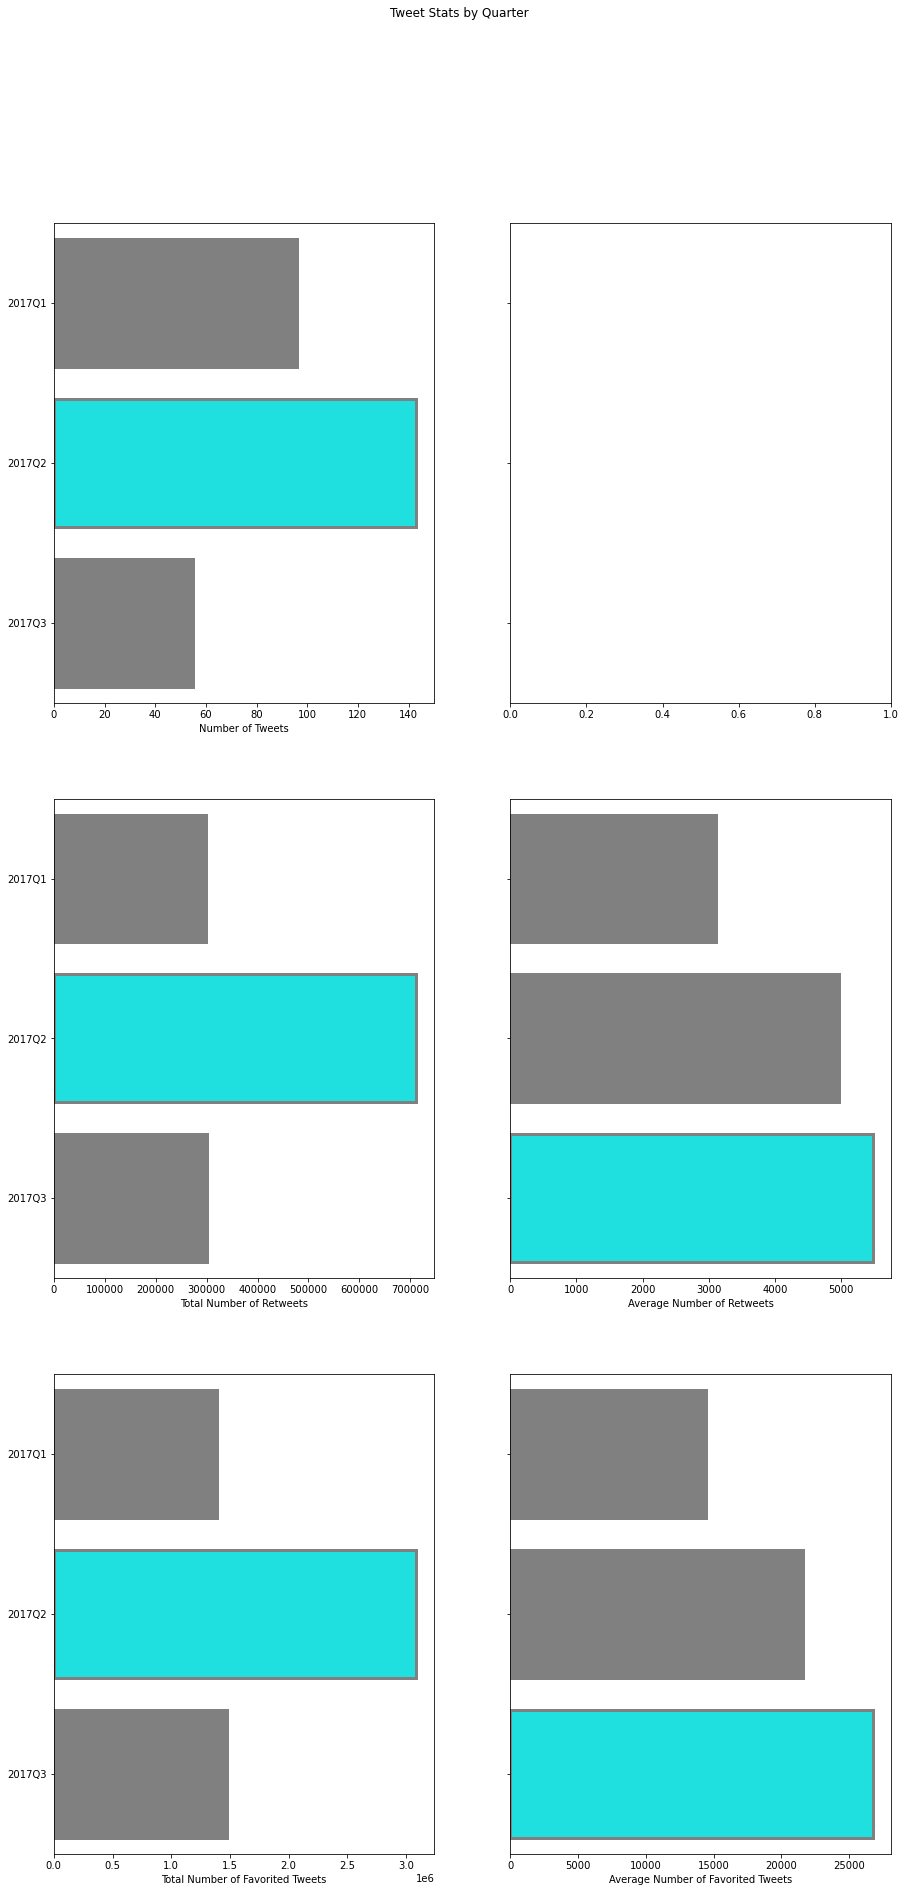

In [362]:
# Plot the different stats by quarter
fig, axes = plt.subplots(3, 2, figsize=(15,30), sharey=True)
fig.suptitle('Tweet Stats by Quarter')

# By number of tweets
tweets_color = ['grey' if (x<max(quarterly_tweets['num_of_tweet'])) else 'cyan' for x in quarterly_tweets['num_of_tweet']]
sns.barplot(ax=axes[0,0], data=quarterly_tweets, x='num_of_tweet', y='quarter', linewidth=3, edgecolor="0.5", palette=tweets_color)
axes[0,0].set(xlabel='Number of Tweets')
axes[0,0].set(ylabel=None)

# By total retweets
retweets_color = ['grey' if (x<max(quarterly_tweets['total_retweet'])) else 'cyan' for x in quarterly_tweets['total_retweet']]
sns.barplot(ax=axes[1,0], data=quarterly_tweets, x='total_retweet', y='quarter', linewidth=3, edgecolor="0.5", palette=retweets_color)
axes[1,0].set(xlabel='Total Number of Retweets')
axes[1,0].set(ylabel=None)

# By average retweets
retweets_color = ['grey' if (x<max(quarterly_tweets['average_retweet'])) else 'cyan' for x in quarterly_tweets['average_retweet']]
sns.barplot(ax=axes[1,1], data=quarterly_tweets, x='average_retweet', y='quarter', linewidth=3, edgecolor="0.5", palette=retweets_color)
axes[1,1].set(xlabel='Average Number of Retweets')
axes[1,1].set(ylabel=None)

# By total favorited
favorited_color = ['grey' if (x<max(quarterly_tweets['total_favorited'])) else 'cyan' for x in quarterly_tweets['total_favorited']]
sns.barplot(ax=axes[2,0], data=quarterly_tweets, x='total_favorited', y='quarter', linewidth=3, edgecolor="0.5", palette=favorited_color)
axes[2,0].set(xlabel='Total Number of Favorited Tweets')
axes[2,0].set(ylabel=None)

# By average favorited
favorited_color = ['grey' if (x<max(quarterly_tweets['average_favorited'])) else 'cyan' for x in quarterly_tweets['average_favorited']]
sns.barplot(ax=axes[2,1], data=quarterly_tweets, x='average_favorited', y='quarter', linewidth=3, edgecolor="0.5", palette=favorited_color)
axes[2,1].set(xlabel='Average Number of Favorited Tweets')
axes[2,1].set(ylabel=None)

* Frequency of tweets per quarter peaked at the first quarter
* All of the measures of user engagement were increasing

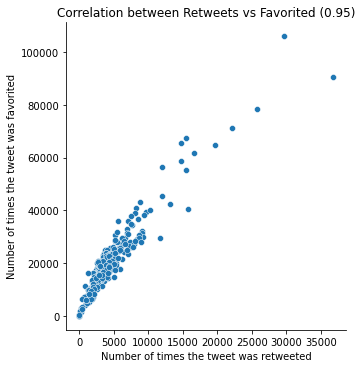

In [363]:
# Let's see the relationship between Retweets and Favorited Tweets
corr=dog_rating_tweets['retweet_count'].corr(dog_rating_tweets['favorite_count'])
sns.relplot(data=dog_rating_tweets, x='retweet_count', y='favorite_count')
plt.xlabel('Number of times the tweet was retweeted')
plt.ylabel('Number of times the tweet was favorited')
plt.title(f'Correlation between Retweets vs Favorited ({round(corr,2)})')
plt.show()


Since retweets and favorited are closely correlated, I picked the number of retweets as the dependent variable in the following analysis of the factors affecting engagements to the WeRateDogs® tweets.

For these analysis I will look at the following factors:
1. Dog related factors:  
    a. Dog Rating  
    b. Dog breed  
2. Tweet related factors:  
    a. Length of tweet text  
    b. Size of image  
3. Time related factors:  
    a. Day of the week  
    b. Time of the day  

In [364]:
# Get the dataframe that includes only the columns to be analysed.
analysis = dog_rating_tweets[['created_at','retweet_count', 'favorite_count','rating_numerator', 'rating_denominator','dog_breed','display_text_range','entities_size_large_w','entities_size_large_h']]

1. Dog related factors

    a. Dog rating

In [365]:
#Check the unique value of rating_denominator
analysis['rating_denominator'].unique()

array([10,  0, 15])

In [366]:
#Since rating_denominator is not the same for all we will compute for the rate
analysis['dog_rate']=round(analysis['rating_numerator']/analysis['rating_denominator'],2)

/tmp/ipykernel_869/2080182855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['dog_rate']=round(analysis['rating_numerator']/analysis['rating_denominator'],2)


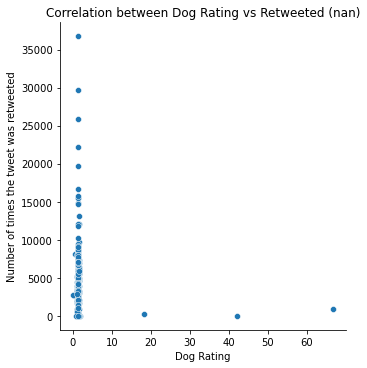

In [367]:
# Let's see the relationship between Dog Rating and Retweet Counts
corr=analysis['dog_rate'].corr(analysis['retweet_count'])
sns.relplot(data=analysis, x='dog_rate', y='retweet_count')
plt.xlabel('Dog Rating')
plt.ylabel('Number of times the tweet was retweeted')
plt.title(f'Correlation between Dog Rating vs Retweeted ({round(corr,2)})')
plt.show()

* This graph shows that there some outliers in the data that might be affecting the computed correlation

In [368]:
outlier = analysis.groupby('dog_rate')\
    .apply(lambda x: pd.Series({
        'num_of_tweet' : x['dog_rate'].count(),
        'median_retweet' : x['retweet_count'].median()
    })).sort_values(by='num_of_tweet').reset_index()
outlier

,dog_rate,num_of_tweet,median_retweet
0,0.00,1.0,2712.0
1,0.50,1.0,8102.0
2,0.60,1.0,2669.0
3,0.73,1.0,2.0
4,1.50,1.0,0.0
5,1.70,1.0,8.0
6,18.20,1.0,297.0
7,42.00,1.0,21.0
8,66.60,1.0,843.0
9,inf,1.0,63.0


In [369]:
# As can be seen in the graph, there are outliers. First we will remove the rates that was only done once
outlier = outlier[outlier['num_of_tweet']==1]['dog_rate']
outlier


0     0.00
1     0.50
2     0.60
3     0.73
4     1.50
5     1.70
6    18.20
7    42.00
8    66.60
9      inf
Name: dog_rate, dtype: float64

In [370]:
analysis=analysis[~analysis['dog_rate'].isin(outlier)]
analysis

,created_at,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_breed,display_text_range,entities_size_large_w,entities_size_large_h,dog_rate
0,2017-08-01 16:23:56+00:00,6881,32923,13,10,unknown,86,540.0,528.0,1.3
1,2017-08-01 00:17:27+00:00,5181,28456,13,10,chihuahua,139,1407.0,1600.0,1.3
2,2017-07-31 00:18:03+00:00,3423,21380,12,10,chihuahua,122,1201.0,1600.0,1.2
3,2017-07-30 15:58:51+00:00,7089,35889,13,10,labrador_retriever,80,1201.0,1600.0,1.3
4,2017-07-29 16:00:24+00:00,7606,34325,12,10,basset,139,720.0,540.0,1.2
...,...,...,...,...,...,...,...,...,...,...
289,2017-02-15 01:04:21+00:00,1662,9510,13,10,pembroke,61,1535.0,2048.0,1.3
290,2017-02-14 23:43:18+00:00,1763,6495,13,10,eskimo_dog,139,1000.0,1734.0,1.3
291,2017-02-14 17:17:22+00:00,2120,8240,13,10,chihuahua,118,1151.0,1886.0,1.3
292,2017-02-14 02:02:51+00:00,1411,8504,12,10,old_english_sheepdog,117,1224.0,1632.0,1.2


In [371]:
# number of tweets and median retweet for each dog rating
analysis.groupby('dog_rate')\
    .apply(lambda x: pd.Series({
        'num_of_tweet' : x['dog_rate'].count(),
        'median_retweet' : x['retweet_count'].median()
    })).reset_index()

,dog_rate,num_of_tweet,median_retweet
0,1.0,6.0,676.0
1,1.1,19.0,3035.0
2,1.2,99.0,3154.0
3,1.3,137.0,3911.0
4,1.4,23.0,5478.0


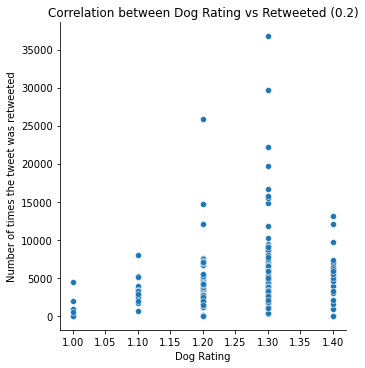

In [372]:
# Let's see the relationship between Dog Rating and Retweet Counts
corr=analysis['dog_rate'].corr(analysis['retweet_count'])
sns.relplot(data=analysis, x='dog_rate', y='retweet_count')
plt.xlabel('Dog Rating')
plt.ylabel('Number of times the tweet was retweeted')
plt.title(f'Correlation between Dog Rating vs Retweeted ({round(corr,2)})')
plt.show()

* Removing the outliers, increased the correlation between dog rating and retweeted

    b. Dog Breed

In [373]:
# number of tweet and median retweet for each of the dog breeds
dog_breed=analysis.groupby(['dog_breed']).apply(lambda x: pd.Series({
    'num_of_tweet' : x['dog_breed'].count(),
    'median_retweet': x['retweet_count'].median()
})).sort_values(by='num_of_tweet', ascending=False).reset_index()
dog_breed

,dog_breed,num_of_tweet,median_retweet
0,unknown,56.0,3417.5
1,golden_retriever,23.0,3464.0
2,pembroke,20.0,4843.0
3,labrador_retriever,19.0,3251.0
4,french_bulldog,11.0,3652.0
...,...,...,...
70,irish_terrier,1.0,3561.0
71,irish_water_spaniel,1.0,4774.0
72,komondor,1.0,2883.0
73,lakeland_terrier,1.0,939.0


<AxesSubplot:xlabel='num_of_tweet', ylabel='Count'>

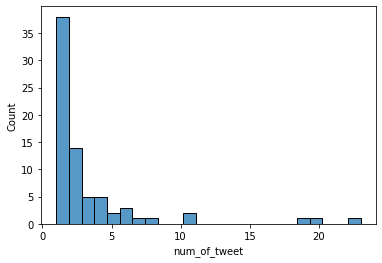

In [374]:
# Removing the unknown and those dog_breeds that tweeted only once
dog_breed_less_unknown = dog_breed[(dog_breed['dog_breed']!='unknown')]
sns.histplot(data=dog_breed_less_unknown, x='num_of_tweet')

In [375]:
# Get the top 10 most twweted dog_breed
dog_breed_most_tweeted = dog_breed_less_unknown.head(10)

[Text(0, 0.5, '')]

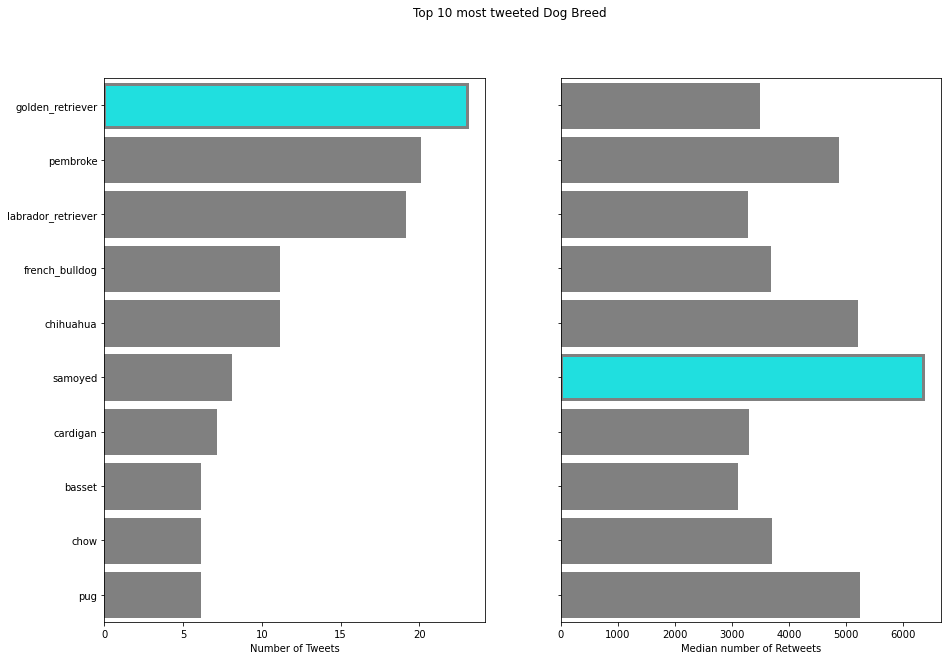

In [376]:
# Plot the different stats by quarter
fig, axes = plt.subplots(1, 2, figsize=(15,10), sharey=True)
fig.suptitle('Top 10 most tweeted Dog Breed')

# By number of tweets
tweets_color = ['grey' if (x<max(dog_breed_most_tweeted['num_of_tweet'])) else 'cyan' for x in dog_breed_most_tweeted['num_of_tweet']]
sns.barplot(ax=axes[0], data=dog_breed_most_tweeted, x='num_of_tweet', y='dog_breed', linewidth=3, edgecolor="0.5", palette=tweets_color)
axes[0].set(xlabel='Number of Tweets')
axes[0].set(ylabel=None)

# By average retweets
retweets_color = ['grey' if (x<max(dog_breed_most_tweeted['median_retweet'])) else 'cyan' for x in dog_breed_most_tweeted['median_retweet']]
sns.barplot(ax=axes[1], data=dog_breed_most_tweeted, x='median_retweet', y='dog_breed', linewidth=3, edgecolor="0.5", palette=retweets_color)
axes[1].set(xlabel='Median number of Retweets')
axes[1].set(ylabel=None)

* Golden retriever is the top most tweeted dog breeed but samoyed recieves the highest median number of retweets for the top 10 most tweeted breeds.

2. Tweet related factors:

    a. Length of tweet text

This section will look at the length of tweet text in relation to user retweets

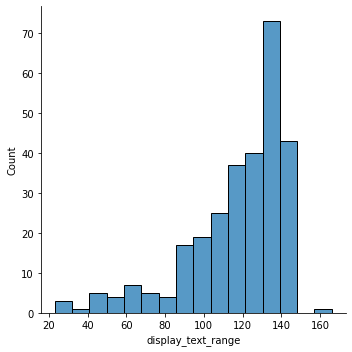

In [377]:
sns.displot(data=analysis, x='display_text_range')

The distribution of the of the text length of the tweets are negatively distributed with the length of around 140 characters as the most numerous.

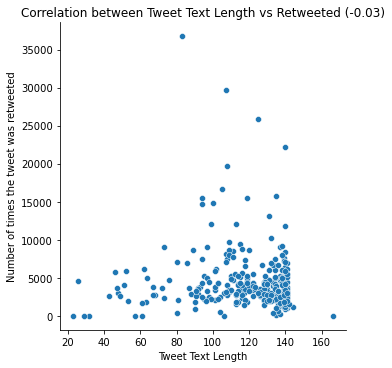

In [378]:
# Let's see the relationship between Length of Texts and Retweet Counts
corr=analysis['display_text_range'].corr(analysis['retweet_count'])
sns.relplot(data=analysis, x='display_text_range', y='retweet_count')
plt.xlabel('Tweet Text Length')
plt.ylabel('Number of times the tweet was retweeted')
plt.title(f'Correlation between Tweet Text Length vs Retweeted ({round(corr,2)})')
plt.show()

* There is only a small negative correlation between the tect lengthe and the number of retweet

    b. Size of Image

The following will look into the largest size of the dog image and how it relates to retweets

In [379]:
# Number of tweets and median retweet by image size
analysis['size'] = analysis['entities_size_large_w']*analysis['entities_size_large_h']
analysis.groupby(['size']).apply(lambda x: pd.Series({
    'num_of_tweet' : x['retweet_count'].count(),
    'median_retweet': x['retweet_count'].median()
})).sort_values(by='num_of_tweet', ascending=False).reset_index()

,size,num_of_tweet,median_retweet
0,1921600.0,47.0,3652.0
1,3145728.0,47.0,3372.0
2,2359296.0,6.0,4223.5
3,1441600.0,5.0,5186.0
4,1920000.0,4.0,3499.5
...,...,...,...
115,1271146.0,1.0,5238.0
116,1241870.0,1.0,2952.0
117,1228800.0,1.0,14733.0
118,1212624.0,1.0,3141.0


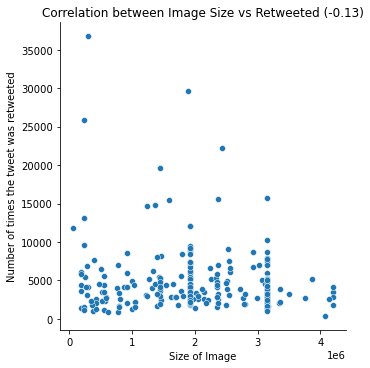

In [380]:
# Let's see the relationship between Size and Retweet Counts
corr=analysis['size'].corr(analysis['retweet_count'])
sns.relplot(data=analysis, x='size', y='retweet_count')
plt.xlabel('Size of Image')
plt.ylabel('Number of times the tweet was retweeted')
plt.title(f'Correlation between Image Size vs Retweeted ({round(corr,2)})')
plt.show()

* There seems to be a small postive correlation between the maximum size and the number of retweets

3. Time Related Factors

    a. Day of the Week

This section will look at the day of the week the tweets are sent and the amount of retweet it gets.

In [381]:
# Add the day of the week from the created_at column
analysis['week_day'] = analysis['created_at'].apply(lambda x: x.strftime('%A'))
analysis

,created_at,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_breed,display_text_range,entities_size_large_w,entities_size_large_h,dog_rate,size,week_day
0,2017-08-01 16:23:56+00:00,6881,32923,13,10,unknown,86,540.0,528.0,1.3,285120.0,Tuesday
1,2017-08-01 00:17:27+00:00,5181,28456,13,10,chihuahua,139,1407.0,1600.0,1.3,2251200.0,Tuesday
2,2017-07-31 00:18:03+00:00,3423,21380,12,10,chihuahua,122,1201.0,1600.0,1.2,1921600.0,Monday
3,2017-07-30 15:58:51+00:00,7089,35889,13,10,labrador_retriever,80,1201.0,1600.0,1.3,1921600.0,Sunday
4,2017-07-29 16:00:24+00:00,7606,34325,12,10,basset,139,720.0,540.0,1.2,388800.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
289,2017-02-15 01:04:21+00:00,1662,9510,13,10,pembroke,61,1535.0,2048.0,1.3,3143680.0,Wednesday
290,2017-02-14 23:43:18+00:00,1763,6495,13,10,eskimo_dog,139,1000.0,1734.0,1.3,1734000.0,Tuesday
291,2017-02-14 17:17:22+00:00,2120,8240,13,10,chihuahua,118,1151.0,1886.0,1.3,2170786.0,Tuesday
292,2017-02-14 02:02:51+00:00,1411,8504,12,10,old_english_sheepdog,117,1224.0,1632.0,1.2,1997568.0,Tuesday


In [382]:
# Number of tweets by day of the week
analysis.groupby(['week_day'])['week_day'].count().sort_values(ascending=False)

week_day
Friday       49
Tuesday      45
Wednesday    43
Monday       42
Saturday     37
Thursday     37
Sunday       31
Name: week_day, dtype: int64

* The amount of tweets sent by day ranged from 252 to 324, with Mondays having the most number of tweets and Saturdays having the least.

<AxesSubplot:xlabel='week_day', ylabel='retweet_count'>

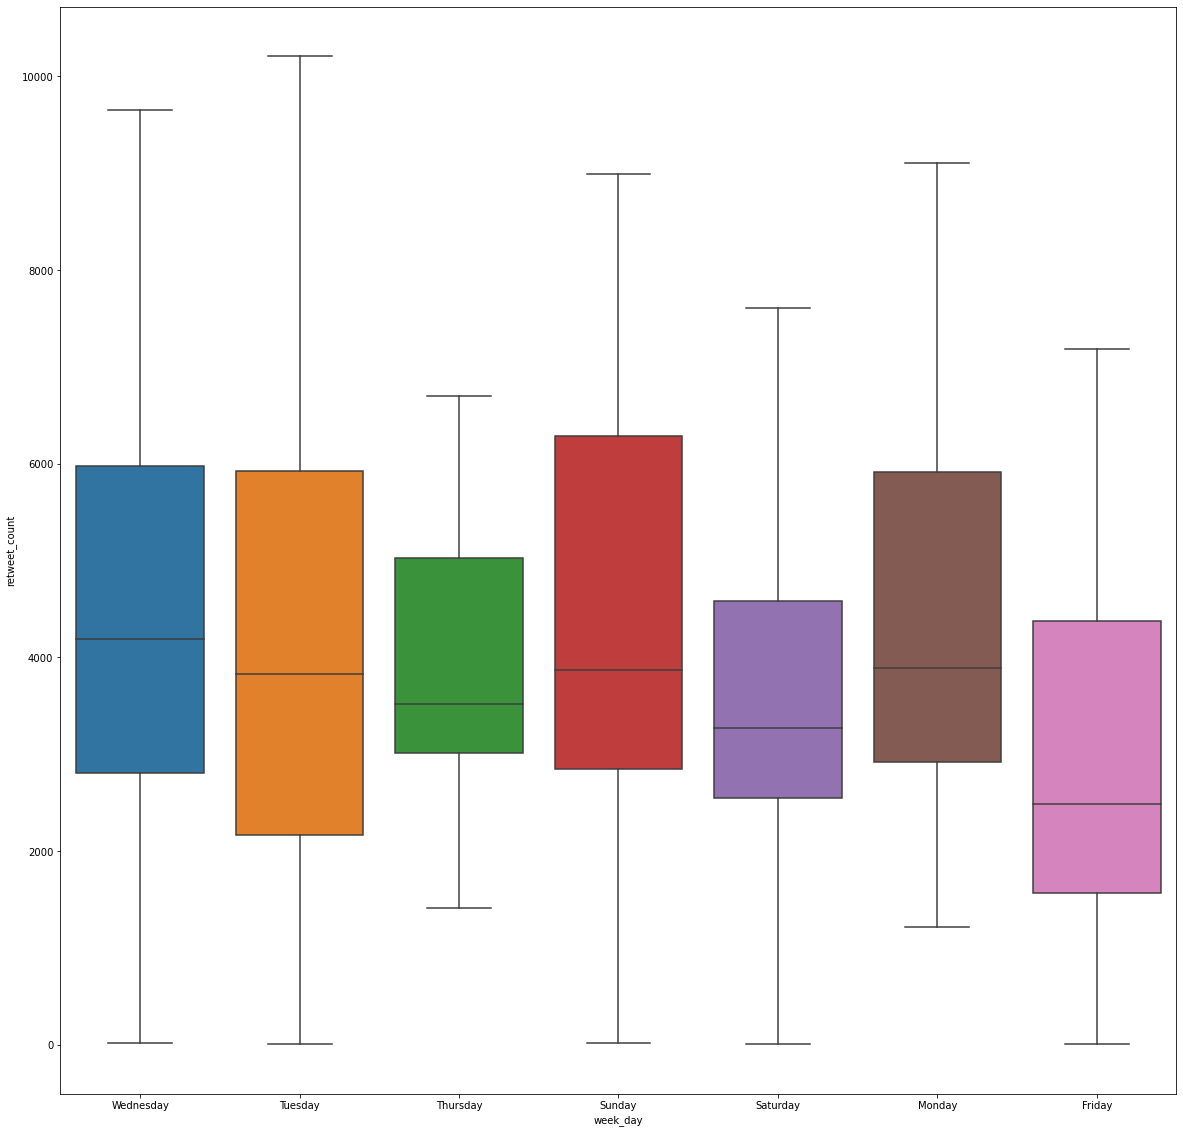

In [383]:
order = analysis.groupby(['week_day'])['retweet_count'].median().iloc[::-1].index
plt.figure(figsize=(20, 20))
sns.boxplot(data=analysis, x='week_day', y='retweet_count', showfliers = False, order=order)

* All days have similar ranges of the amount of retweet

    b. Hour of the Day

The following will look at the hour of day that tweets are being sent

In [384]:
# Create the hour of day based on the created_at column
analysis['hour_of_day'] = analysis['created_at'].apply(lambda x: x.strftime('%H'))
analysis

,created_at,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_breed,display_text_range,entities_size_large_w,entities_size_large_h,dog_rate,size,week_day,hour_of_day
0,2017-08-01 16:23:56+00:00,6881,32923,13,10,unknown,86,540.0,528.0,1.3,285120.0,Tuesday,16
1,2017-08-01 00:17:27+00:00,5181,28456,13,10,chihuahua,139,1407.0,1600.0,1.3,2251200.0,Tuesday,00
2,2017-07-31 00:18:03+00:00,3423,21380,12,10,chihuahua,122,1201.0,1600.0,1.2,1921600.0,Monday,00
3,2017-07-30 15:58:51+00:00,7089,35889,13,10,labrador_retriever,80,1201.0,1600.0,1.3,1921600.0,Sunday,15
4,2017-07-29 16:00:24+00:00,7606,34325,12,10,basset,139,720.0,540.0,1.2,388800.0,Saturday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2017-02-15 01:04:21+00:00,1662,9510,13,10,pembroke,61,1535.0,2048.0,1.3,3143680.0,Wednesday,01
290,2017-02-14 23:43:18+00:00,1763,6495,13,10,eskimo_dog,139,1000.0,1734.0,1.3,1734000.0,Tuesday,23
291,2017-02-14 17:17:22+00:00,2120,8240,13,10,chihuahua,118,1151.0,1886.0,1.3,2170786.0,Tuesday,17
292,2017-02-14 02:02:51+00:00,1411,8504,12,10,old_english_sheepdog,117,1224.0,1632.0,1.2,1997568.0,Tuesday,02


In [385]:
hour=analysis.groupby(['hour_of_day']).apply(lambda x: pd.Series({
    'num_of_tweet' : x['hour_of_day'].count(),
    'median_retweet': x['retweet_count'].median()
})).reset_index()
hour

,hour_of_day,num_of_tweet,median_retweet
0,00,70.0,4132.0
1,01,24.0,2697.5
2,02,2.0,1790.0
3,03,5.0,9657.0
4,04,1.0,8500.0
5,12,2.0,12.5
6,13,2.0,3057.0
7,14,1.0,3104.0
8,15,17.0,4167.0
9,16,72.0,3571.0


In [386]:
# Since there are missing hours we coul add them
dict_missing_hours = {'hour_of_day': ['07', '08', '09', '10', '11', '13'],
                     'num_of_tweet': [0, 0, 0, 0, 0, 0]}
missing_hours = pd.DataFrame(dict_missing_hours)
hour = hour.append(missing_hours, ignore_index =True)
hour = hour.sort_values(by='hour_of_day')

Text(0, 0.5, 'Number of Tweet')

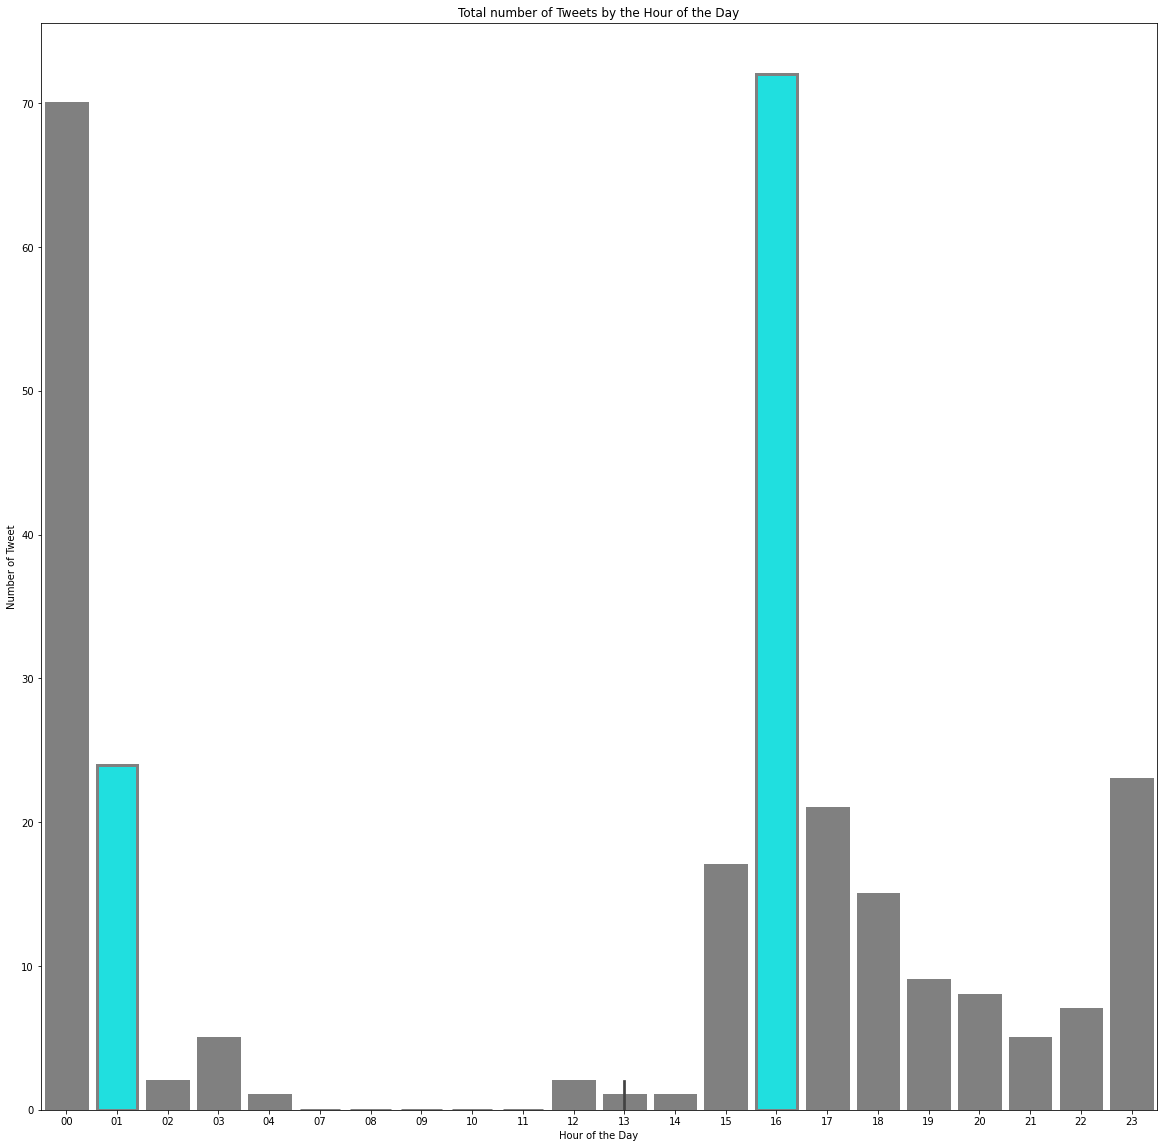

In [387]:
#Graph the number of tweets by the hour
plt.figure(figsize=(20, 20))
tweets_color = ['cyan' if (x in ['01', '15']) else 'grey' for x in hour['hour_of_day']]
sns.barplot(data=hour, x='hour_of_day', y='num_of_tweet', linewidth=3, edgecolor="0.5", palette=tweets_color)
plt.title('Total number of Tweets by the Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweet')

* There are two peaks. One is at 0100 and the other is at 1600

In [388]:
max(hour['median_retweet'])

9657.0

Text(0, 0.5, 'Median Number of Retweet')

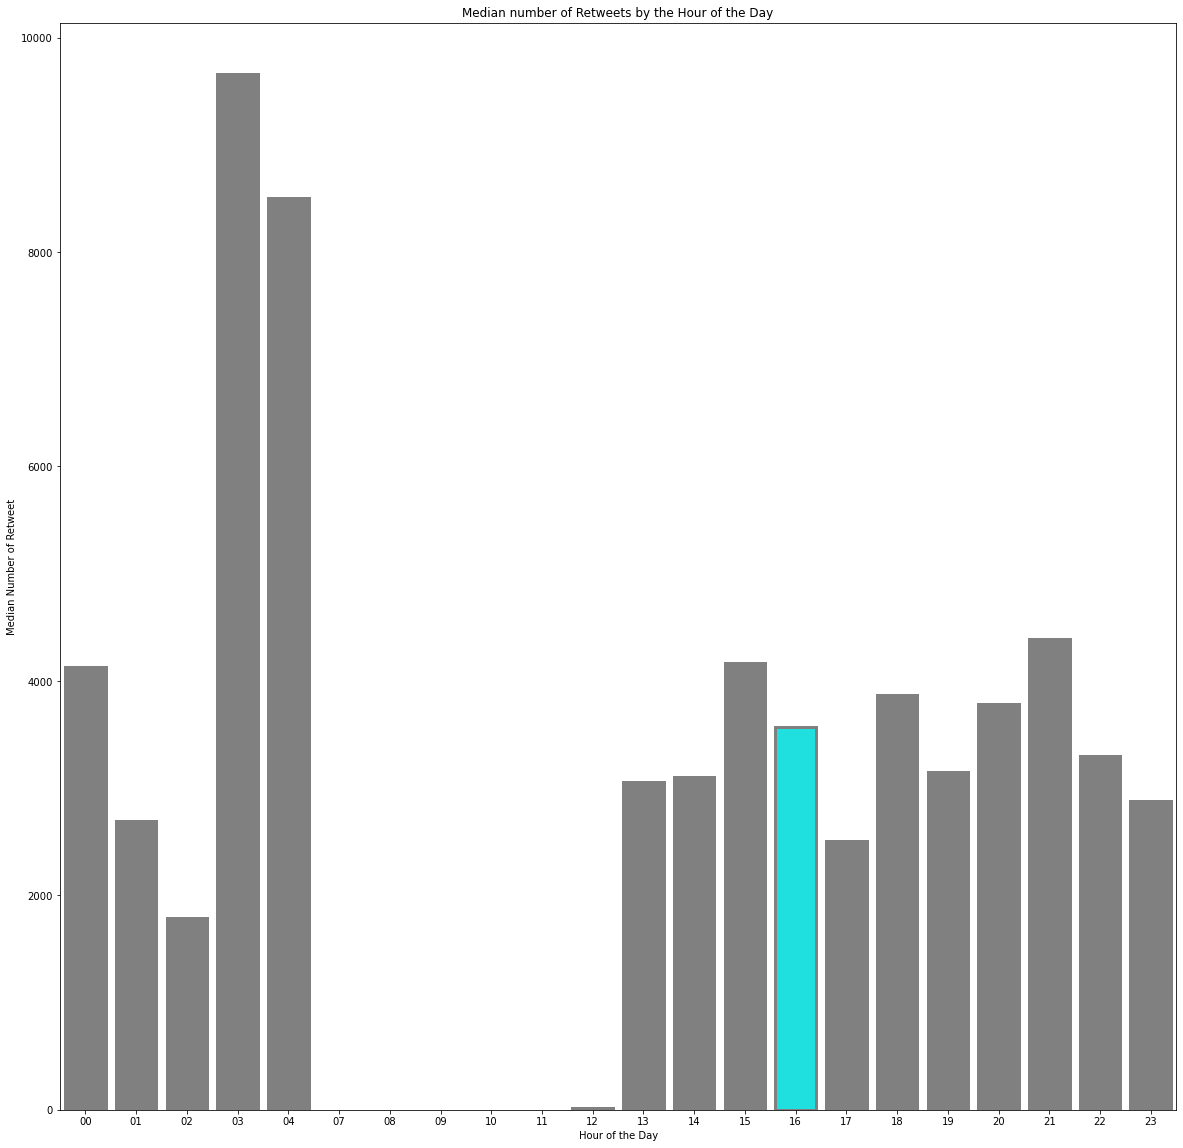

In [389]:
#Graph the median number of retweets by the hour
plt.figure(figsize=(20, 20))
retweets_color = ['cyan' if (x=='15') else 'grey' for x in hour['hour_of_day']]
sns.barplot(data=hour, x='hour_of_day', y='median_retweet', linewidth=3, edgecolor="0.5", palette=retweets_color)
plt.title('Median number of Retweets by the Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Median Number of Retweet')

* Tweets sent at 1600 have the highest median number of retweets

### Insights:
1. WeRateDogs® had posted the most tweets in the first quarter since they created their accounts and since decreased the rate of their posts. Though their number of tweets per quarter had decreased the number of times that their tweets are retweeted and favorited are increasing.

2. Dog rating is directly proportional to the number of retweets

3. Golden retriever images is the most number of tweets but Samoyed images have the highest median number of retweets among the top 10 most tweeted dog breed

4. There is a slight negative relationship between the length of text and number of retweets while the size of image have a positive correlation to the number of retweets.

5. Most tweets are sent on Mondays and Saturday has the least but the number of retweets is similar among the different days.

6. In terms of number of time tweets are being sent out, there are two peaks. One at 0100 and another at 1600. Tweets sent at 1600 has the highest median number of retweets


### Visualization

In [390]:
def define_dog_breed(x):
    if x in ['samoyed']:
        return 'Highest median number of retweets'
    else:
        return 'Others'
analysis['high_retweet_dog_breed'] = analysis['dog_breed'].apply(lambda x: define_dog_breed(x))

In [391]:
def define_hour(x):
    if x == '16':
        return 'Yes'
    else:
        return 'No'
analysis['hour_1600'] = analysis['hour_of_day'].apply(lambda x: define_hour(x))

<Figure size 6480x360 with 0 Axes>

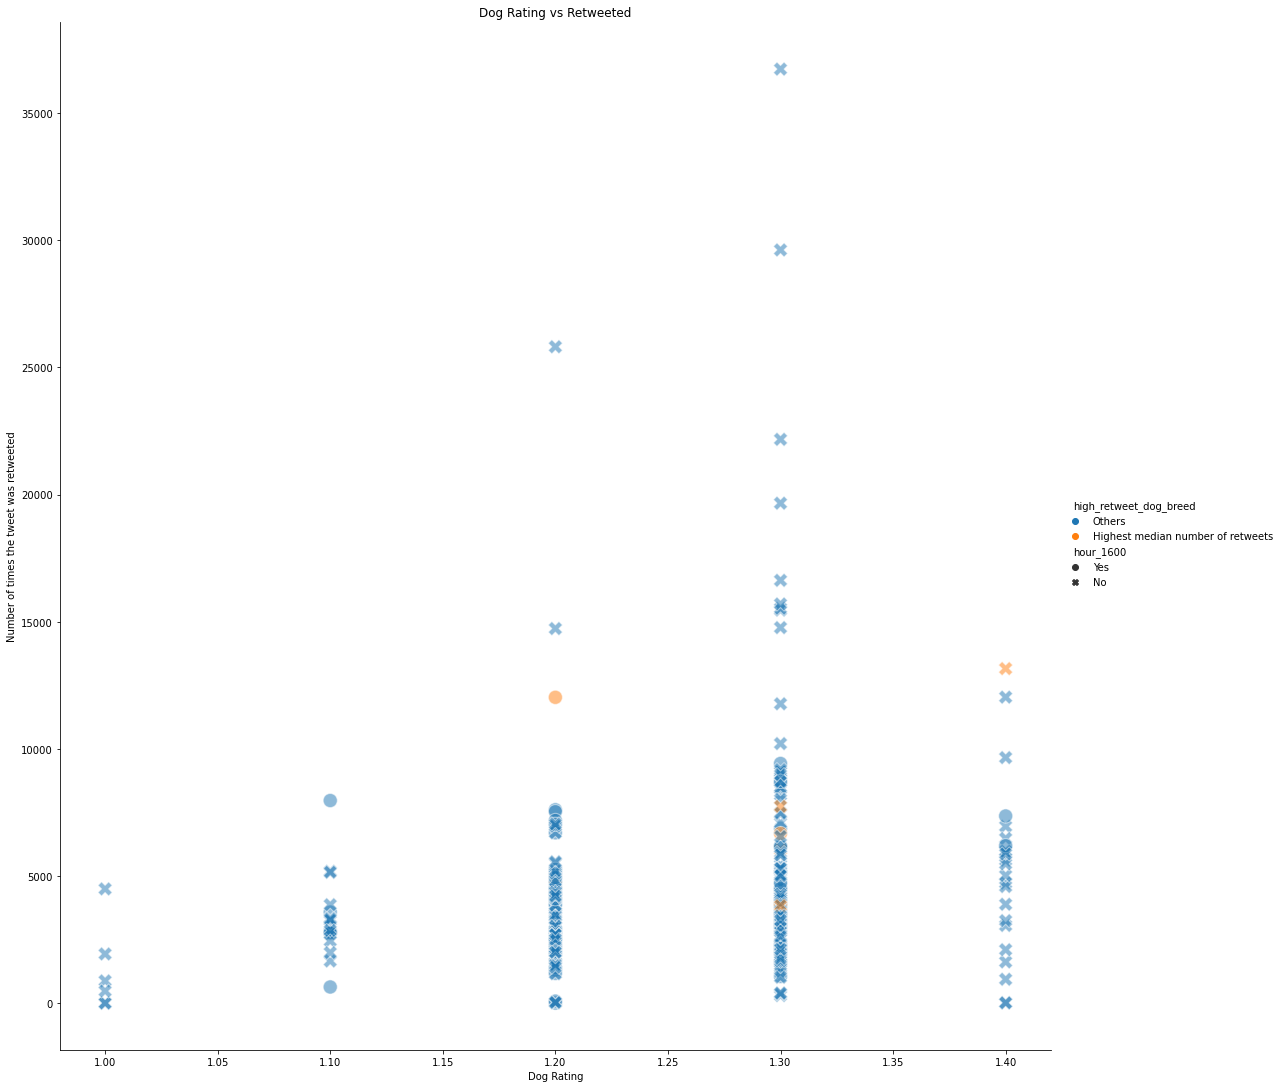

In [392]:
plt.figure(figsize=(90, 5))
sns.relplot(data=analysis, x='dog_rate', y='retweet_count', hue = 'high_retweet_dog_breed', style='hour_1600', legend=True, height=15, s=200, alpha=0.5)
plt.xlabel('Dog Rating')
plt.ylabel('Number of times the tweet was retweeted')
plt.title('Dog Rating vs Retweeted')
plt.show()